<h4 style="text-align:right">The Course of Computational Physics,&nbsp; Peking University</h4>
***
<p><br>
<h1 style="text-align:center"><font face="宋体" size=6>计算物理学第四次作业</font></h1>
<br></p>
<h2 style="text-align:center"><font face="楷体">姓名:&nbsp;贺鑫</font> </h2>
<h2 style="text-align:center"> <font face="楷体">学号:&nbsp; _1500011805_</font></h2>

## 1 Runge-Kutta 4 阶计算常微分方程
> 计算微分方程 $m\frac{d\vec{v}}{dt}=q\vec{v}\times\vec{B}$的解，初始位置$(0,0,0)$，初始速度$(0,2,0.1)$，磁场方向沿z轴($B_x=B_y=0$)，令$\omega=qB_z/m=1$,

> solution  
这是一个关于速度的初值问题，可以写出方程
$\begin{pmatrix}v'_x\\v'_y\\v'_z\end{pmatrix}=\frac{q}{m}
\begin{pmatrix}v_yB_z-v_zB_y\\v_zB_x-v_xB_z\\v_xB_y-v_yB_x\end{pmatrix}
=\begin{pmatrix}v_y\\-v_x\\0\end{pmatrix}$

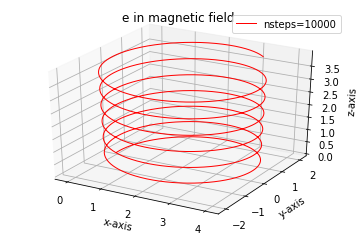

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

###### init
###    we can revise nsteps=1000, 4000, 10000, as discribed as follow
tini=0;tfin=40;nsteps=10000;
dt=(tfin-tini)/nsteps;
x=np.zeros(nsteps+1);y=np.zeros(nsteps+1);z=np.zeros(nsteps+1);
vx=np.zeros(nsteps+1);vy=np.zeros(nsteps+1);vz=np.zeros(nsteps+1);
x[0]=0;y[0]=0;z[0]=0;
vx[0]=0;vy[0]=2;vz[0]=0.1
###### init

###### motion
for i in range(nsteps):
    # update x direction
    kvx1=vy[i]
    kvx2=vy[i]+dt/2*kvx1
    kvx3=vy[i]+dt/2*kvx2
    kvx4=vy[i]+dt*kvx3
    vx[i+1]=vx[i]+dt*(kvx1+2*kvx2+2*kvx3+kvx4)/6.0
    x[i+1]=x[i]+dt*vx[i]
    
    #update y direction
    kvy1=-vx[i]
    kvy2=-vx[i]-dt/2*kvx1
    kvy3=-vx[i]-dt/2*kvx2
    kvy4=-vx[i]-dt*kvx3
    vy[i+1]=vy[i]+dt*(kvy1+2*kvy2+2*kvy3+kvy4)/6.0
    y[i+1]=y[i]+dt*vy[i]
    
    # update z direction
    vz[i+1]=vz[i]
    z[i+1]=z[i]+dt*vz[i]
    
    #print(x[i],y[i],z[i])    

fig = plt.figure()
ax=fig.gca(projection='3d')
ax.plot(x, y, z, lw=1, color='r',label='nsteps=%d'%nsteps)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
ax.set_title("e in magnetic field")
ax.legend()
plt.savefig('elec_motion_%d.png'%nsteps)
plt.show()

> 时间区间选取的为$[0,40]$，我们可以看到，$nsteps=1000,4000,10000$时，运动轨迹分别为：  
![nsteps=1000](./elec_motion_1000.png)
![nsteps=4000](./elec_motion_4000.png)
![nsteps=10000](./elec_motion_10000.png)

## 2 求解二阶常微分方程
> $y''-2y'+2y=e^{2x}sin(x),\,\,x\in[0,1],\,y(0)=-0.4,\,y'(0)=-0.6$

> solution  
可以使用降维法：  
$$\begin{eqnarray}
&v'&=&2v-2y+e^{2x}sin(x) \\
&y'&=&v\\
\text{初始条件为}&\\
&y(0)&=&-0.4 \\
&v(0)&=&-0.6
\end{eqnarray}$$
程序实现如下：

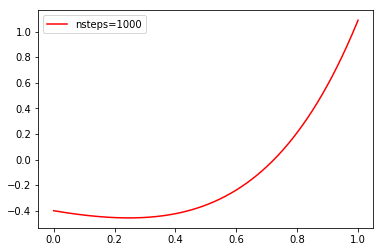

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def fv(x,y,v):
    return 2*v-2*y+np.exp(2*x)*np.sin(x)
def fy(x,y,v):
    return v

###### initialization
xini=0;xfin=1
nsteps=1000; dx=(xfin-xini)/nsteps;
x=np.linspace(xini,xfin,nsteps+1)
y=np.zeros(nsteps+1)
v=np.zeros(nsteps+1)
y[0]=-0.4
v[0]=-0.6;
###### initialization

###### motion, here we still use RK4
for i in range(nsteps):
    kv1=fv(x[i],y[i],v[i])
    kv2=fv(x[i]+dx/2,y[i],v[i]+dx/2*kv1)
    kv3=fv(x[i]+dx/2,y[i],v[i]+dx/2*kv2)
    kv4=fv(x[i]+dx,y[i],v[i]+dx*kv3)
    v[i+1]=v[i]+dx*(kv1+2*kv2+2*kv3+kv4)/6.0
    
    ky1=fv(x[i],y[i],v[i])
    ky2=fv(x[i]+dx/2,y[i]+dx/2*ky1,v[i])
    ky3=fv(x[i]+dx/2,y[i]+dx/2*ky2,v[i])
    ky4=fv(x[i]+dx,y[i]+dx*ky3,v[i])
    y[i+1]=y[i]+dx*(ky1+2*ky2+2*ky3+ky4)/6.0

plt.plot(x,y,'r-',label='nsteps=%d'%nsteps)
plt.legend()
plt.savefig('ode2.png')
plt.show()


## 洛伦兹吸引子
> $\begin{pmatrix}y'_1\\y'_2\\y'_3\end{pmatrix}
=\begin{pmatrix}-\beta & 0 & y_2 \\
0 & -\sigma & \sigma \\
-y_2 & \rho & -1
\end{pmatrix}
\begin{pmatrix}y_1\\y_2\\y_3\end{pmatrix}$  
>可以自行选取$\sigma,\,\rho,\,\beta$ (课件上是10，28，5/3)，在课件的基础上对参数略做改动如下：

dt=0.010000,nsteps=10000.000000
sigma=10.000000,rho=28.000000,beta=2.666667


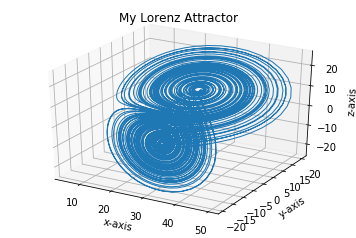

dt=0.010000,nsteps=10000.000000
sigma=10.000000,rho=28.000000,beta=5.000000


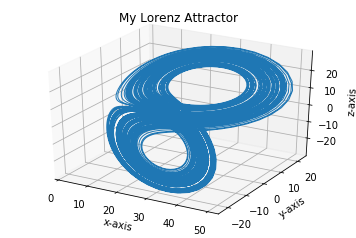

dt=0.010000,nsteps=10000.000000
sigma=10.000000,rho=28.000000,beta=1.000000


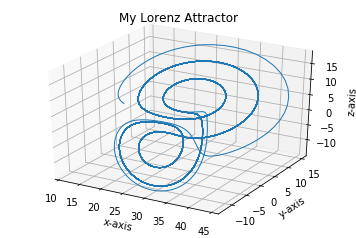

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class myLA:
    tini=0;tfin=10;nsteps = 10000;
    dt = (tfin-tini)/nsteps
    sigma=10;rho=28;beta=5/3;
    x=0;y=0;z=0;
    
    def __init__(self,dt,nsteps):
        self.dt=dt
        self.nsteps=nsteps
        self.x = np.empty(nsteps+1)
        self.y = np.empty(nsteps+1)
        self.z = np.empty(nsteps+1)
        
    def setpars(self,sigma,rho,beta):
        self.sigma=sigma
        self.rho=rho
        self.beta=beta
        
    def ini_cord(self,x0,y0,z0):
        self.x[0]=x0
        self.y[0]=y0
        self.z[0]=z0
        
    def show(self):
        print('dt=%f,nsteps=%f'%(self.dt,self.nsteps))
        print('sigma=%f,rho=%f,beta=%f'%(self.sigma,self.rho,self.beta))
        
    def lor_v(self,y1, y2, y3):
        v1 = -self.beta * y1 + y2 * y3
        v2 = self.sigma * ( -y2 + y3 ) 
        v3 = -y1 * y2 + self.rho * y2 - y3
        return v1,v2,v3

    def traj(self):
        for i in range(self.nsteps):
            vx, vy, vz = self.lor_v(self.x[i], self.y[i], self.z[i])
            self.x[i + 1] = self.x[i] + (vx * self.dt)
            self.y[i + 1] = self.y[i] + (vy * self.dt)
            self.z[i + 1] = self.z[i] + (vz * self.dt)
            
        # then 3Dplot figure
        fig = plt.figure()
        ax=fig.gca(projection='3d')
        ax.plot(self.x, self.y, self.z, lw=1)
        ax.set_xlabel("x-axis")
        ax.set_ylabel("y-axis")
        ax.set_zlabel("z-axis")
        ax.set_title("My Lorenz Attractor")
        plt.savefig('LA%f%f%f.png'%(self.sigma,self.rho,self.beta))
        plt.show()
        
lorentz=myLA(0.01,10000)

#### case 1 of ppt ####
lorentz.setpars(10,28,8/3)
lorentz.ini_cord(12,4,0)
lorentz.show()
lorentz.traj()

#### case 2 ####
lorentz.setpars(10,28,5)
lorentz.ini_cord(12,4,0)
lorentz.show()
lorentz.traj()

#### case 3 ####
lorentz.setpars(10,28,1)
lorentz.ini_cord(12,4,0)
lorentz.show()
lorentz.traj()

## 4 possion方程的求解

> 对于 possion 方程，最终转化成求解$Mu=w$的矩阵方程。对于非边界的情况为:  
$$u_{n-1}-2u_n+u_{n+1}=v_n(x)dx^2,\,\,for\,n=1,N-1$$  
对于边界条件$n=0,n=N$：  
$$\alpha_0 u_0 dx + \beta_0 (u_1-u_0) = \gamma_0 dx$$
$$\alpha_N u_N dx + \beta_N (u_N-u_{N-1}) = \gamma_N dx$$

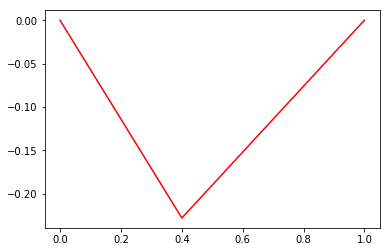

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import myThomas # the Thomas process written by myself
%matplotlib inline

######  here give the density distribution  #######
######  here is an approximate delta-function with width 2D，gives an unit electron population
def den(x,D):
    if( np.abs(x-0.4) < D ):
        return 0.5/D #note the width is 2D
    else:
        return 0
    
###################################################
# boundary condition, which formulate as 
#                   inia*u+inib*u'=inig
#                   fina*u+finb*u'=fing
#          you can revise as you like
inia=1;inib=0;inig=0;
fina=1;finb=0;fing=0;
###################################################
    
xini=0;xfin=1;nsteps=10000;
dx=(xfin-xini)/nsteps
x=np.linspace(xini,xfin,nsteps+1)

### initialize a(main-diag), b(down-diag), c(up-diag), and w vectors
b=np.ones(nsteps)*(1)
a=np.ones(nsteps+1)*(-2)
c=np.ones(nsteps)*(1)
w=np.zeros(nsteps+1)
for i in range(len(w)):
    w[i]=den(xini+i*dx , 0.001)*dx*dx # here D can be little bigger than dx
    
# add with boundary condition
a[0]=inia-inib/dx;c[0]=inib/dx;w[0]=inig;
a[-1]=fina+finb/dx;b[-1]=-finb/dx;w[-1]=fing;

# solve M*u=w by Thomas algorithm as a module
u=myThomas.Thomas(a,b,c,w)

# plot the result
plt.plot(x,u,'r-')
plt.show()